<a href="https://colab.research.google.com/github/HimanshuRajput013/Mobile_Price_Range_Prediction/blob/main/Copy_of_Mobile_Price_Range_Prediction_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Project Name**    - **`Mobile_Price_Range_Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Project Summary -**

In this colab, we have implemented a Mobile Price Prediction using different Machine Learning Algorithms. This project will classify the price range of the mobile price. The price ranges from 0-3. We’ll discuss the price range in the dataset. It's a classification problem. Now we have trained a mobile price classification using different ML algorithms. This model classifies the range of the mobile based on the different parameters like from camera, touch screen, cores, battery, clock speed, internal memory, battery capacity, etc. After training the model using different algorithms, we compared all the models..

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Mobile phones come in all sorts of prices, features, specifications and all. Price estimation and prediction is an important part of consumer strategy. Deciding on the correct price of a product is very important for the market success of a product. A new product that has to be launched, must have the correct price so that consumers find it appropriate to buy the product.

The data contains information regarding mobile phone features, specifications etc and their price range. The various features and information can be used to predict the price range of a mobile phone..**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Dataset Loading

In [ ]:
# Load Dataset
url = 'https://drive.google.com/file/d/14POIAwdkuHscsXFoWqeUMV9rc-C2tGj-/view?usp=drive_link'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]


In [ ]:

df = pd.read_csv(url,encoding ='latin')

# Set the option to display all columns

pd.pandas.set_option('display.max_columns',None)

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

In [ ]:
df.tail()

In [ ]:
df.describe(include='all')

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

### Dataset Information

In [ ]:
# Dataset Info
df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

There's no null and duplicate values.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.nunique()

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

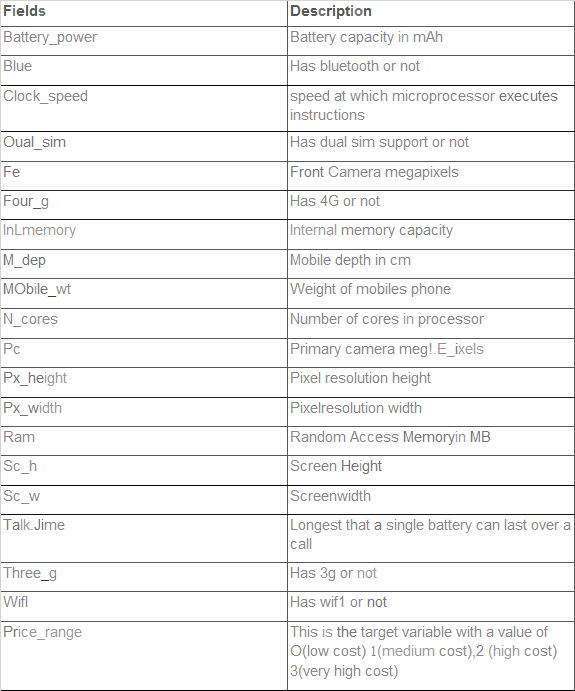

In [ ]:
# Dataset Describe
df.describe()

Here we can see that there are some entries in px_height and sc_w which are 0 and that is not possible so we will remove all these wrong data.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

# Total phones with sc_w = 0
print(len(df[df.sc_w == 0]))
# Total phones with px_height = 0
print(len(df[df.px_height == 0]))

In [ ]:
df['sc_w'][df[df.sc_w == 0].index] = df.sc_w.mean()
df['px_height'][df[df.px_height == 0].index] = df.px_height.mean()

In [ ]:
df.describe()

### What all manipulations have you done and insights you found?

Some columns have zero values we replace them by mean values.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1   Price range vs Ram

In [ ]:
# Chart - 1 visualization code

sns.barplot(x=df['price_range'],y=df["ram"])
plt.title('Price range v/s Ram')

##### 1. Why did you pick the specific chart?

Relationship between ram and Price range.

##### 2. What is/are the insight(s) found from the chart?

As the ram incraeses Price is also Incraeses.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

With these factor we can decide the price range and ram to be given as per price category.

#### Chart - 2 Price Range vs Primary Camera

In [ ]:
# Chart - 2 visualization code
sns.pointplot(y="pc", x="price_range", data=df)

##### 1. Why did you pick the specific chart?

This chart shows realtion between Price Range and Primary camera Mega pixel.

##### 2. What is/are the insight(s) found from the chart?

Primary camera Mega pixel price incraeses so price range also incraeses.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Primary camera Mega pixel factor can decide the price range,so we can decide Primary camera Mega pixel for every category.

#### Chart - 3 Price Range vs Number of Cores

In [ ]:
# Chart - 3 visualization code


df.groupby(["price_range"])['n_cores'].value_counts().unstack().plot(kind = "bar",figsize=(20,8))
#plt.figure(figsize=(15,6))
plt.title('Price range v/s no. of cores')
plt.show()

##### 1. Why did you pick the specific chart?

To check relation between price range and No. of cores.

##### 2. What is/are the insight(s) found from the chart?

In low range phones most mobiles have 8 cores.

In medium range phones most mobiles have 1 or 4 cores.

In high range phones most mobiles have 4 cores.

In very high range phones most mobiles have 5 cores.

Answer Here

#### Chart - 4 Internal memory vs Price range

In [ ]:
# Chart - 4 visualization code

sns.pointplot(y="int_memory", x="price_range", data=df)

##### 1. Why did you pick the specific chart?

To check relation between price range and Internal Memory.

##### 2. What is/are the insight(s) found from the chart?

When we move to high range to very high range mobile the sudden increment in internal memory can be seen.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it will help



#### Chart - 5   Battery Power vs Price Range

In [ ]:
# Chart - 5 visualization code
sns.pointplot(y="battery_power", x="price_range", data=df)

##### 1. Why did you pick the specific chart?

To check relation b/w price range and battery.

##### 2. What is/are the insight(s) found from the chart?

Low range mobile phones have low battery capacity.

Medium and high range have almost equal battery power.

Very high range mobiles have high battery power.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it will help.

#### Chart - 6 Talk Time vs Price Range


In [ ]:
# Chart - 6 visualization code
sns.pointplot(y="talk_time", x="price_range", data=df)


##### 1. Why did you pick the specific chart?

To check relation between talk time and price range..

##### 2. What is/are the insight(s) found from the chart?

*Low range phones have low talk time.

*Medium range phones have highest talk time.

*High and very high range phones have moderate talk time.

***This result is may be due to the more features in high range phones which drains more battery that's why it is possible to have low talk time while having high battery power.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes

#### Chart - 7 Mobile Weight vs Price Range

In [ ]:
# Chart - 7 visualization code
sns.pointplot(y="mobile_wt", x="price_range", data=df)

##### 1. Why did you pick the specific chart?

To check the relation between mobile weight and price range.

##### 2. What is/are the insight(s) found from the chart?

*Low and Medium range have similar weight.

*High range have more weight due to battery and feature incraese.

*Very high range phones have very low weight.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes.

#### Chart - 8 Pixel Height and Width vs Price Range

In [ ]:
# Chart - 8 visualization code
sns.pointplot(y="px_width", x="price_range", data=df)
plt.show()
sns.pointplot(y="px_height", x="price_range", data=df)

##### 1. Why did you pick the specific chart?

To check relation between Pixel Height and Width vs Price Range.

##### 2. What is/are the insight(s) found from the chart?

*Low range phones have low pixel height and width.

*Medium and high range phones have moderate pixel height and width.

*Very high range phones have high pixel height and width.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes

#### Chart - 9 Value Counts of different features

In [ ]:
# Chart - 9 visualization codefor i in ["blue",'dual_sim','four_g','n_cores','three_g','touch_screen','wifi','price_range']:
for i in ["blue",'dual_sim','four_g','n_cores','three_g','touch_screen','wifi','price_range']:
  df[i].value_counts().plot(kind = "pie",autopct='%1.1f%%')
  plt.show()

##### 1. Why did you pick the specific chart?

To examine value counts of different features.

##### 2. What is/are the insight(s) found from the chart?

76% phones have 3G while 24% do not and all other features are almost balanced.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes

#### Chart - 10 Front Camera and Price Range

In [ ]:
# Chart - 10 visualization code
sns.pointplot(y="fc", x="price_range", data=df)

##### 1. Why did you pick the specific chart?

this chart show the relation between price range and front camera pixel.

##### 2. What is/are the insight(s) found from the chart?

as we move low to high pixel  is incraese when price range incraese.

**When it comes to Very high range phone peoples not just want high mega pixel but also camera with good camera sensor,So may be it is low.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), cmap='coolwarm', annot = True)

##### 1. Why did you pick the specific chart?

To check the multicollinearity.

##### 2. What is/are the insight(s) found from the chart?

*RAM is the most influential feature in price prediction.

*3G & 4G, pixel height & width, screen height & width and front camera & primary camera are correlated which is obvious.

***We will merge this columns in feature manipulation section.

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code
sns.pairplot(df, hue="price_range")